In [141]:
# Logistic Regression
# This regression best for binary classification problem
# example: either your bike will breakdown or not (yes=1 or no=0)
# Threshold value  = 0.5 (middle value of 0 and 1)
# if probability > 0.5 then your bike will breakdown and if probability < 0.5 then your bike will not breakdown

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [143]:
# import titanic data
titanic_data = fetch_openml("titanic",version=1,as_frame=True)

In [144]:
# separate training and target variable(data) 
df = titanic_data["data"]
df["survived"] = titanic_data["target"]

In [145]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


<Axes: xlabel='survived', ylabel='count'>

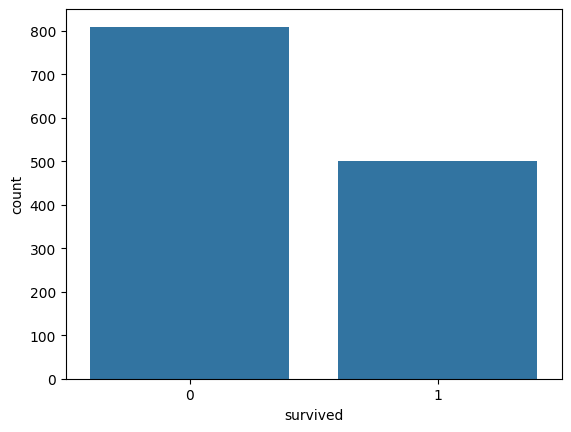

In [146]:
# this graph represented number of survived and not-survived people
sns.countplot(x="survived",data=df)

<Axes: xlabel='survived', ylabel='count'>

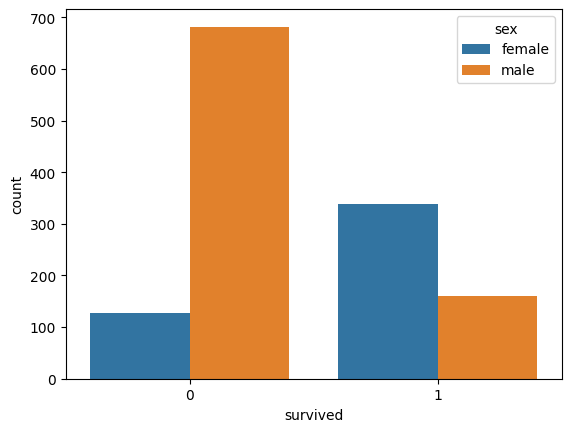

In [147]:
# this graph represented number of male and female survived and not-survived
sns.countplot(x="survived",hue="sex",data=df)

<Axes: xlabel='survived', ylabel='count'>

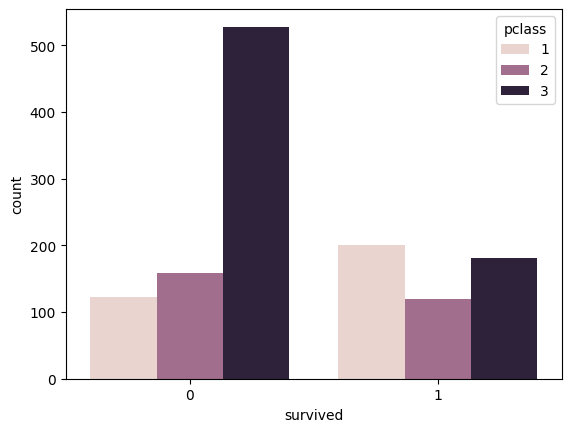

In [148]:
# this graph represented class wise survived and not-survived people
sns.countplot(x="survived",hue="pclass",data=df)

In [149]:
# null value determining
df.isnull().sum()

pclass          0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
survived        0
dtype: int64

<Axes: title={'center': 'Missing value (%)'}, ylabel='Percentage'>

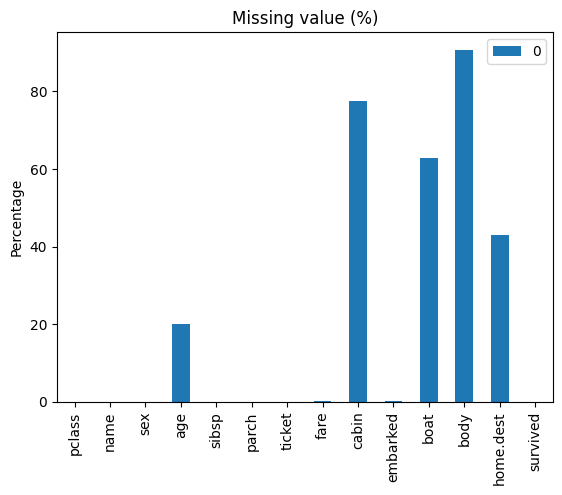

In [150]:
# missing value in percentage
miss_values_per = pd.DataFrame(df.isnull().sum()/len(df)*100)
miss_values_per.plot(kind="bar" , title="Missing value (%)",ylabel="Percentage")

In [151]:
# find if person is traveled alone or with family
df["family"] = df["sibsp"] + df["parch"]
df.loc[df["family"] >0,"traveled_alone"] = 0
df.loc[df["family"] ==0,"traveled_alone"] = 1

In [152]:
df.drop(["sibsp","parch"],axis=1,inplace=True)

Text(0.5, 1.0, 'Number of people traveled alone')

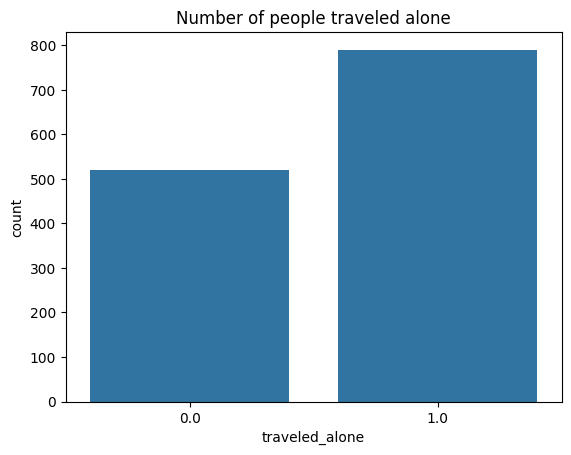

In [153]:
sns.countplot(x="traveled_alone",data=df)
plt.title("Number of people traveled alone")

In [154]:
# removing unnecessary columns
df.drop(["name","ticket","home.dest","body","cabin","boat"],axis=1,inplace=True)

In [155]:
# encode sex columns
from sklearn.preprocessing import OneHotEncoder
df["sex"] = OneHotEncoder().fit_transform(df[["sex"]]).toarray()[:,1]
df.head()

,pclass,sex,age,fare,embarked,survived,family,traveled_alone
0,1,0.0,29.0000,211.3375,S,1,0,1.0
1,1,1.0,0.9167,151.5500,S,1,3,0.0
2,1,0.0,2.0000,151.5500,S,0,3,0.0
3,1,1.0,30.0000,151.5500,S,0,3,0.0
4,1,0.0,25.0000,151.5500,S,0,3,0.0


In [156]:
df.isnull().sum()

pclass              0
sex                 0
age               263
fare                1
embarked            2
survived            0
family              0
traveled_alone      0
dtype: int64

In [157]:
# imputing null value
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy="mean")
df["age"] = imp_mean.fit_transform(df[["age"]])
df["fare"] = imp_mean.fit_transform(df[["fare"]])

In [158]:
imp_freq = SimpleImputer(strategy="most_frequent")
df["embarked"] = imp_freq.fit_transform(df[["embarked"]]).ravel()

In [159]:
df.isnull().sum()

pclass            0
sex               0
age               0
fare              0
embarked          0
survived          0
family            0
traveled_alone    0
dtype: int64

In [160]:
df.head()

,pclass,sex,age,fare,embarked,survived,family,traveled_alone
0,1,0.0,29.0000,211.3375,S,1,0,1.0
1,1,1.0,0.9167,151.5500,S,1,3,0.0
2,1,0.0,2.0000,151.5500,S,0,3,0.0
3,1,1.0,30.0000,151.5500,S,0,3,0.0
4,1,0.0,25.0000,151.5500,S,0,3,0.0


In [161]:
embark = pd.get_dummies(df["embarked"],drop_first=True)
df = pd.concat([df,embark],axis=1)
df.drop(["embarked"],axis=1,inplace=True)

In [166]:
# convert True and False into 0 and 1 in s column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Q"] = le.fit_transform(df["Q"])
df["S"] = le.fit_transform(df["S"])

,pclass,sex,age,fare,survived,family,traveled_alone,Q,S
0,1,0.0,29.000000,211.3375,1,0,1.0,0,1
1,1,1.0,0.916700,151.5500,1,3,0.0,0,1
2,1,0.0,2.000000,151.5500,0,3,0.0,0,1
3,1,1.0,30.000000,151.5500,0,3,0.0,0,1
4,1,0.0,25.000000,151.5500,0,3,0.0,0,1
...,...,...,...,...,...,...,...,...,...
1304,3,0.0,14.500000,14.4542,0,1,0.0,0,0
1305,3,0.0,29.881135,14.4542,0,1,0.0,0,0
1306,3,1.0,26.500000,7.2250,0,0,1.0,0,0
1307,3,1.0,27.000000,7.2250,0,0,1.0,0,0


In [172]:
# septate training and target variable
x = df.drop(["survived"],axis=1)
y = df["survived"]
x.head()

,pclass,sex,age,fare,family,traveled_alone,Q,S
0,1,0.0,29.0000,211.3375,0,1.0,0,1
1,1,1.0,0.9167,151.5500,3,0.0,0,1
2,1,0.0,2.0000,151.5500,3,0.0,0,1
3,1,1.0,30.0000,151.5500,3,0.0,0,1
4,1,0.0,25.0000,151.5500,3,0.0,0,1


In [171]:
y.head()

0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: category
Categories (2, object): ['0', '1']

In [173]:
# separate training and testing data
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [174]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((916, 8), (393, 8), (916,), (393,))

In [176]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [177]:
pred = model.predict(x_test)

In [182]:
from sklearn import metrics
metrics.accuracy_score(y_test,pred)

0.7964376590330788

In [183]:
metrics.confusion_matrix(y_test,pred)

array([[204,  32],
       [ 48, 109]])